Universidade Presbiteriana Mackenzie  
Ciência de Dados
Análise exploratória de dados 
Aula 7 - Aplicando conhecimento
Aluno: Yuri dos Santos Radziwill

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset disponível em: https://www.kaggle.com/datasets/juliotorniero/civil-defense-occurrences
datapath = "data/civil_defense_br.csv"
cases = pd.read_csv(datapath)

cases.head()



,Date,State,City,Complaint,Status,Population,Dead,Enjuried,Ill,Homeless,...,Telecom_expedenture,Transportation_expedenture,Fuel_expedenture,Public_safety_expedenture,Schooling_expedenture,Agriculture_loss,Livestocking_loss,Industry_loss,Commerce_loss,Service_loss
0,2022-12-31,MG,Cataguases,13214 - Tempestade Local/Convectiva - Chuvas I...,Register,69810,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,2022-12-30,RS,Paraiso do Sul,14110 - Estiagem,Register,7336,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,2023-01-02,RS,Taquarucu do Sul,14110 - Estiagem,Register,2970,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,12851327.00,7527500.0,0.0,0.0,0.0
3,2022-12-29,RS,Mata,14110 - Estiagem,Register,5111,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1680000.00,2969515.0,0.0,0.0,0.0
4,2023-01-02,RS,Lajeado do Bugre,14110 - Estiagem,Register,2487,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,22563541.67,210000.0,0.0,0.0,0.0


In [3]:
#Normalização de dados
cases['Date'] = pd.to_datetime(cases['Date'])
cases['Year'] = cases['Date'].dt.year
cases['Month'] = cases['Date'].dt.month

In [4]:
#Exploração Inicial dos Dados:
cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29602 entries, 0 to 29601
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  29602 non-null  datetime64[ns]
 1   State                                 29602 non-null  object        
 2   City                                  29602 non-null  object        
 3   Complaint                             29602 non-null  object        
 4   Status                                29602 non-null  object        
 5   Population                            29602 non-null  int64         
 6   Dead                                  29602 non-null  int64         
 7   Enjuried                              29602 non-null  int64         
 8   Ill                                   29602 non-null  int64         
 9   Homeless                              29602 non-null  int64         
 10

# Descrição do Dataset

Neste dataset temos os dados de registros da defesa civil dos entre os anos 2020 e 2022, com detalhamento de:

- **Data da ocorrência**: Registro temporal dos eventos
- **Local da ocorrência**: 
  - Cidade
  - Estado
- **Informações sobre vítimas**:
  - Número de mortos
  - Número de feridos
  - Número de enfermos
- **Informações sobre desabrigados**:
  - Número de desabrigados
  - Número de desalojados
  - Pessoas afetadas
- **Danos físicos e financeiros**:
  - Danos em residências
  - Danos em instalações públicas
  - Danos em infraestrutura

In [5]:
# Verificando valores nulos no dataset
total_nulos = cases.isnull().sum().sum()
total_celulas = cases.size

print(f"Total de valores nulos no dataset: {total_nulos}")
print(f"Total de células no dataset: {total_celulas}")
print(f"Porcentagem de valores nulos: {(total_nulos/total_celulas * 100):.2f}%")


#Função para realizar contagem de outliers 
def contar_outliers(grupo, coluna):
    Q1 = grupo[coluna].quantile(0.25)  # Primeiro quartil
    Q3 = grupo[coluna].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Contar valores fora dos limites
    return ((grupo[coluna] < limite_inferior) | (grupo[coluna] > limite_superior)).sum()

#Contando os outliers por estado
outliers_por_estado = cases.groupby('State').apply(contar_outliers, coluna='Enjuried')
print("\nQuantidade de Outliers do campo de feridos agrupado por estado:")
print(outliers_por_estado)



Total de valores nulos no dataset: 0
Total de células no dataset: 1598508
Porcentagem de valores nulos: 0.00%

Quantidade de Outliers do campo de feridos agrupado por estado:
State
AC     1
AL    18
AM    36
AP     7
BA    47
CE    15
DF     2
ES    14
GO     8
MA    40
MG    96
MS    13
MT     6
PA    38
PB     6
PE    26
PI     2
PR    27
RJ    31
RN    60
RO     4
RR     3
RS    22
SC    84
SE     3
SP    50
TO     4
dtype: int64


C:\Users\noise\AppData\Local\Temp\ipykernel_1704\3367016598.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_por_estado = cases.groupby('State').apply(contar_outliers, coluna='Enjuried')


In [101]:
# Filtrando as ocorrencias do tipo '13214 - Tempestade Local/Convectiva - Chuvas Intensas'
intense_rain = cases[cases['Complaint'].str.startswith('13214')] 

print(f"Total de casos de chuvas intensas: {len(intense_rain)}")
print(f"Estatísticas de desabrigados: ")
print(f"Média por casos: {intense_rain['Displaced'].mean():.2f}")
print(f"Mediana: {intense_rain['Displaced'].median():.2f}")
print(f"Desvio padrão: {intense_rain['Displaced'].std():.2f}")
print(f"Valor mais comum: {intense_rain['Displaced'].mode()[0]}")
print(f"Máximo de desabrigados: {intense_rain['Displaced'].max()}")
print(f"Mínimo: {intense_rain['Displaced'].min()}")


Total de casos de chuvas intensas: 2927
Estatísticas de desabrigados: 
Média por casos: 277.49
Mediana: 2.00
Desvio padrão: 2094.60
Valor mais comum: 0
Máximo de desabrigados: 98644
Mínimo: 0


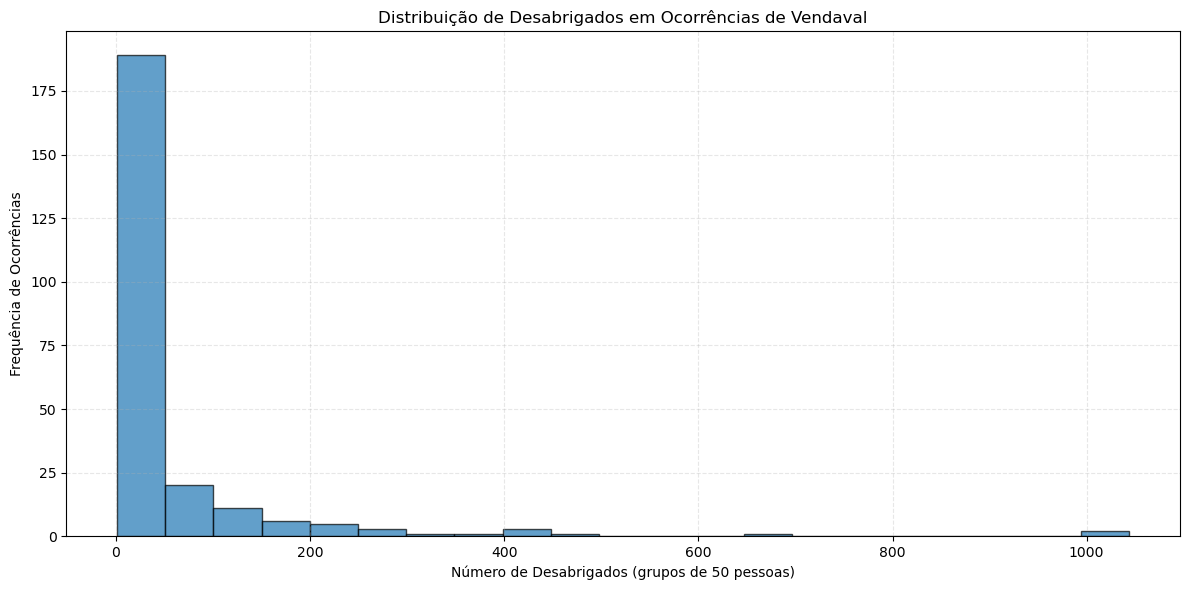

In [ ]:
#filtrando pela ocorrencia "13215 - Tempestade Local/Convectiva - Vendaval" que resultaram em desabrigados
vendaval = cases[cases['Complaint'].str.startswith('13215') & (cases['Displaced'] > 0)]

max_displaced = vendaval['Displaced'].max()
n_bins = int(np.ceil(max_displaced / 50))  # Grupos de 50 pessoas

plt.figure(figsize=(12, 6))
plt.hist(vendaval['Displaced'], 
         bins=n_bins,
         edgecolor='black',
         alpha=0.7)

plt.title('Distribuição de Desabrigados em Ocorrências de Vendaval')
plt.xlabel('Número de Desabrigados (grupos de 50 pessoas)')
plt.ylabel('Frequência de Ocorrências')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Na análise anterior, foi examinada a distribuição das ocorrências de vendavais a partir do número de desabrigados, utilizando um histograma com intervalos de classe de 50 desabrigados. Observou-se que os casos com até 50 desabrigados correspondem à faixa de maior frequência, concentrando a maior parte dos registros.

A frequência diminui gradativamente nas classes subsequentes, até aproximadamente a faixa de 300 desabrigados, indicando que eventos com impacto moderado são menos recorrentes. Curiosamente, a partir da classe de 400 desabrigados, verifica-se um novo aumento na frequência, sugerindo a existência de um segundo grupo de eventos com alto impacto e número expressivo de desabrigados.

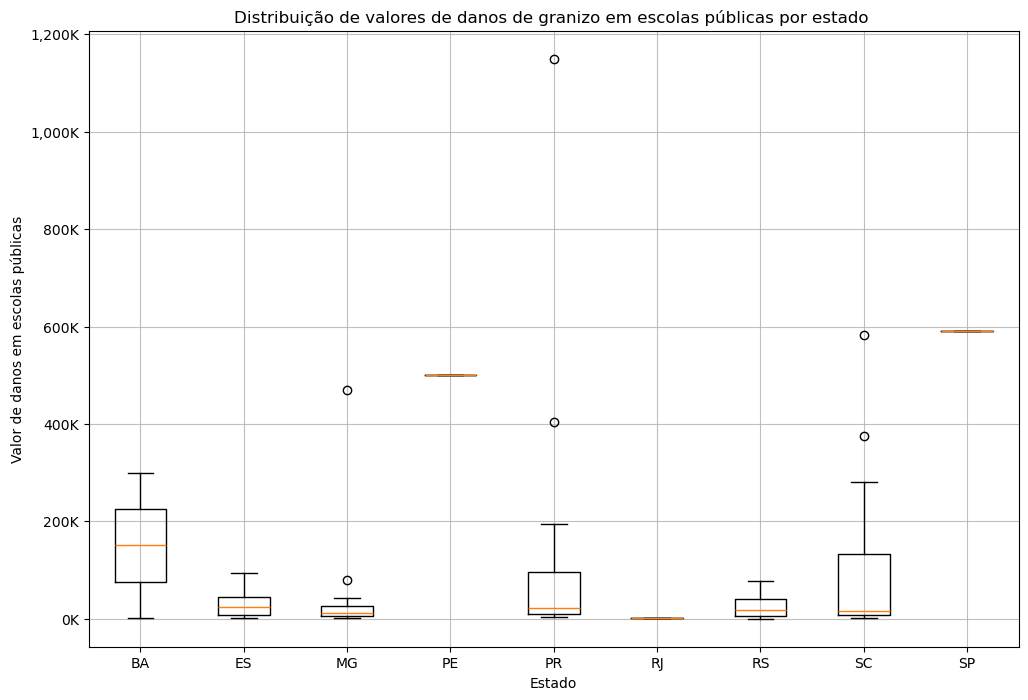

In [90]:
#filtrando por casos do tipo "13213 - Tempestade Local/Convectiva - Granizo" que resultaram em danos a escolas públicas
granizo = cases[cases['Complaint'].str.startswith('13213') & (cases['Public_schools_damaged'] > 0) & (cases['Public_schools_value'] > 0)] 

plt.figure(figsize=(12, 8))
plt.boxplot([granizo[granizo['State'] == state]['Public_schools_value'] 
             for state in sorted(granizo['State'].unique())],
            tick_labels=sorted(granizo['State'].unique()))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000):,}K'))
plt.title('Distribuição de valores de danos de granizo em escolas públicas por estado ')
plt.xlabel('Estado')
plt.ylabel('Valor de danos em escolas públicas')
plt.grid(True, alpha=0.8)
plt.show()


Na análise anterior, foram examinados especificamente os registros de danos ocasionados por tempestades de granizo em escolas públicas. Para essa finalidade, foi elaborado um gráfico com agrupamento por estado, possibilitando a comparação dos custos registrados e a avaliação da distribuição desses valores.

Observou-se a ausência de registros em diversos estados, além de São Paulo (SP), Pernambuco (PE) e Rio de Janeiro (RJ) apresentarem apenas um registro cada, o que pode indicar uma possível subnotificação ou inconsistência no processo de coleta de dados.

Nos estados de Minas Gerais (MG), Paraná (PR) e Santa Catarina (SC), identificou-se uma mediana de custos relativamente baixa, sugerindo que, na maior parte dos casos, os danos reportados foram de menor magnitude. Contudo, também foram observados registros classificados como outliers nesses estados, os quais representam eventos com custos significativamente superiores à média, indicando a ocorrência de estragos de maior proporção.

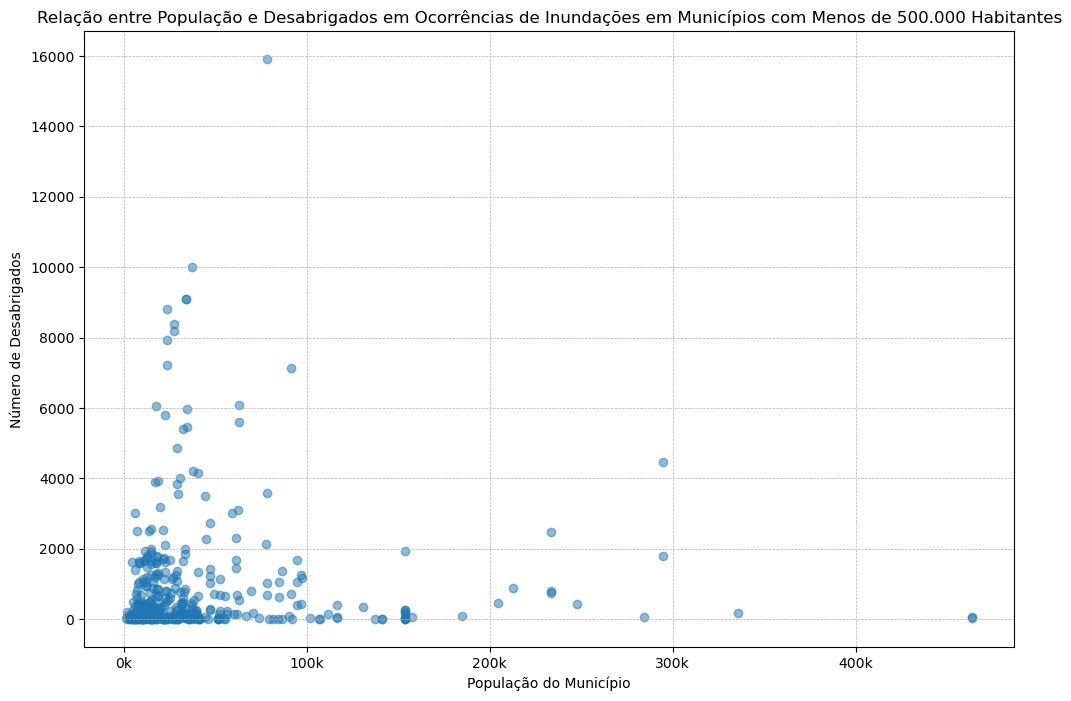

In [85]:
# filtrando por registros do tipo de ocorrencia "12100 - Inundacoes" com desabrigados em cidades com menos de 500.000 habitantes
flood_records = cases[cases['Complaint'].str.startswith('12100') & (cases['Displaced'] > 0) & (cases["Population"] < 500000)]

#scattering plot
plt.figure(figsize=(12, 8))
plt.scatter(flood_records['Population'], flood_records['Displaced'], alpha=0.5)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))
plt.title('Relação entre População e Desabrigados em Ocorrências de Inundações em Municípios com Menos de 500.000 Habitantes')
plt.xlabel('População do Município')
plt.ylabel('Número de Desabrigados')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Na análise anterior, foi explorada a relação entre o número de desabrigados e a população total dos municípios afetados por inundações nos últimos anos, por meio de um gráfico de dispersão (scatter plot). Observa-se que não há uma correlação clara entre o tamanho da população municipal e a quantidade de desabrigados, indicando que municípios maiores nem sempre apresentam maior número absoluto de afetados por esse tipo de desastre.

Adicionalmente, nota-se que a maioria dos registros disponíveis refere-se a municípios com população inferior a 100 mil habitantes. Esse padrão pode refletir a maior vulnerabilidade estrutural de cidades menores ou, alternativamente, uma maior frequência de registros disponíveis nesses contextos.

C:\Users\noise\AppData\Local\Temp\ipykernel_1704\3167745538.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


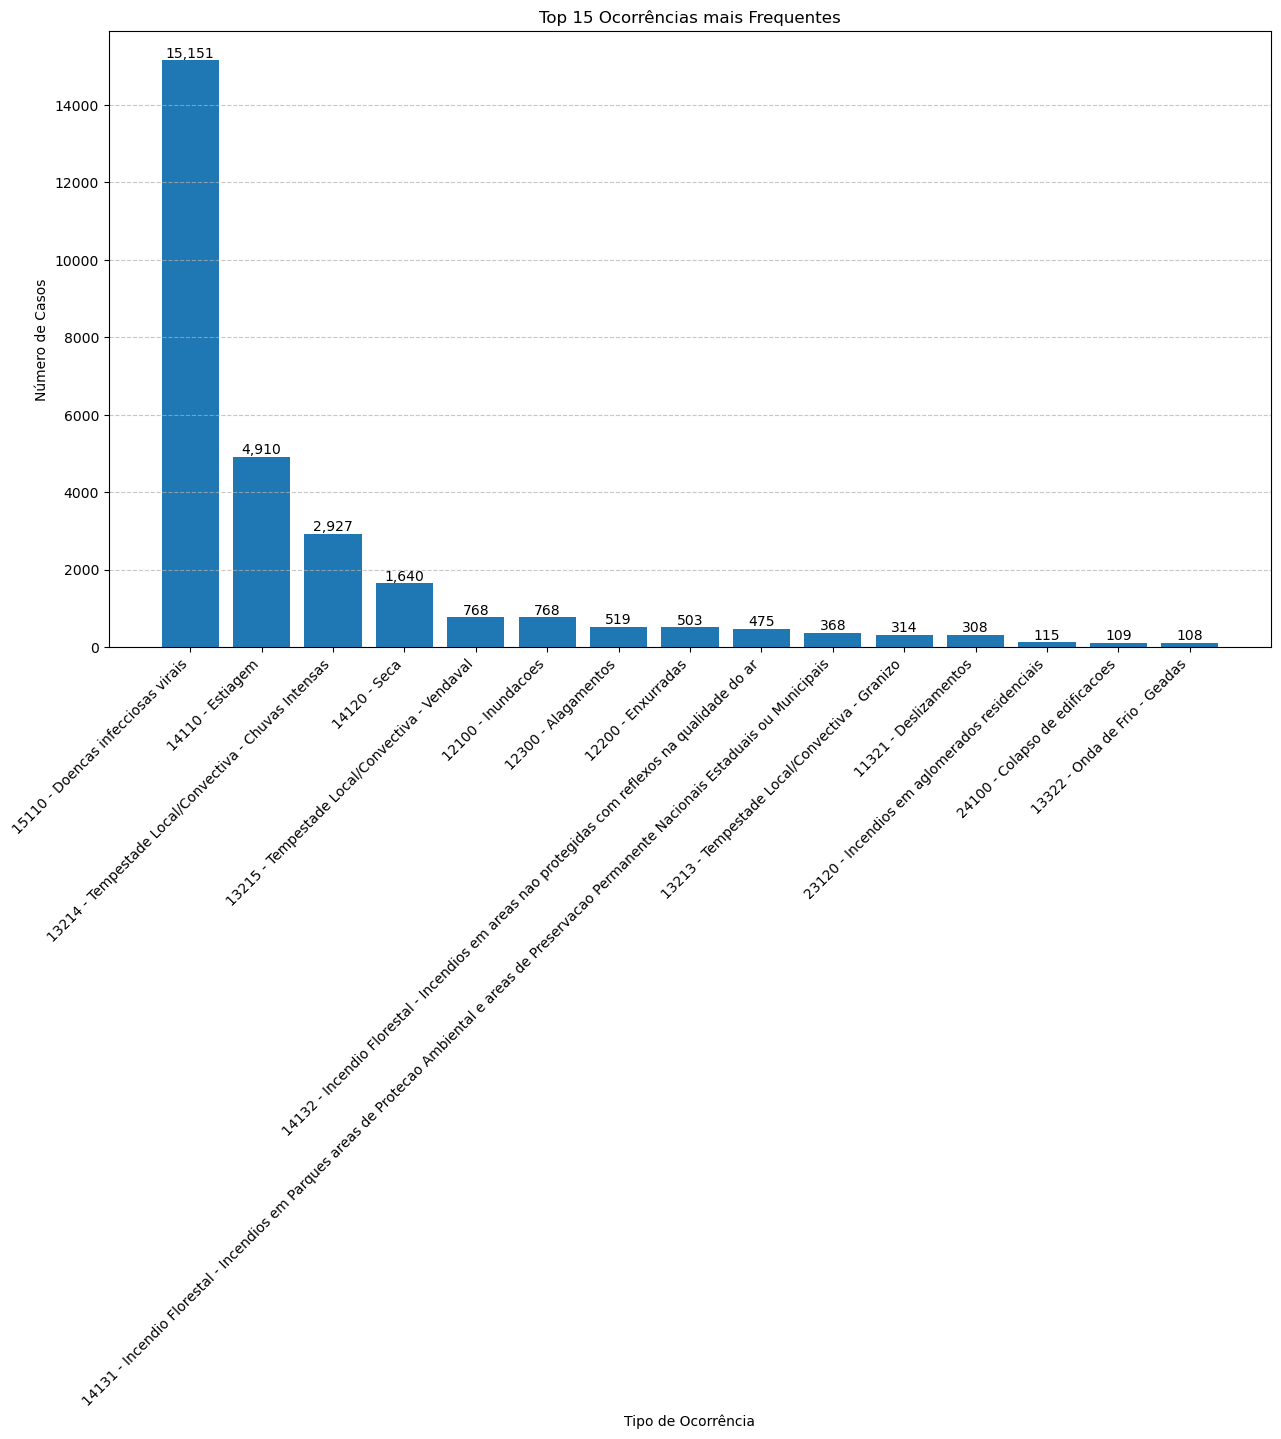

In [94]:
# Criar totalizador agrupando por Complaint e pegar top 15
complaint_counts = cases['Complaint'].value_counts().head(15)

plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(complaint_counts)), complaint_counts.values)
plt.xticks(range(len(complaint_counts)), complaint_counts.index, rotation=45, ha='right')
#Adiciona os valores em cima das barras
for i, v in enumerate(complaint_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Adicionar títulos e labels
plt.title('Top 15 Ocorrências mais Frequentes')
plt.xlabel('Tipo de Ocorrência')
plt.ylabel('Número de Casos')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [91]:
from scipy.stats import kstest
kstest_result = kstest(cases['Displaced'], 'norm')
print(f"Estatística do teste de Kolmogorov-Smirnov: {kstest_result.statistic}")

Estatística do teste de Kolmogorov-Smirnov: 0.5


In [96]:
# filtrando casos de doenças infecciosas "15110 - Doencas infecciosas virais" com registros de doentes no ano de 2022
infectious_cases = cases[cases['Complaint'].str.startswith('15110') & (cases['Ill'] > 0) & (cases['Year'] == 2022)]

correlation = infectious_cases[['Population', 'Ill', 'Dead']].corr(method='pearson')
print("\nCorrelação entre população, doentes e mortos em registros de doenças infecciosas:")
print(correlation)


Correlação entre população, doentes e mortos em registros de doenças infecciosas:
            Population       Ill      Dead
Population    1.000000  0.938015  0.968723
Ill           0.938015  1.000000  0.973673
Dead          0.968723  0.973673  1.000000
